# The objective of this notebook is to convert the TIEGCM into the format accepted by ODL's Force_drag_tiegcm.C++ file


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
####################################
## TESTING WITH ONE
####################################

tiegcm = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_truth/tiegcm_trueLow.nc.175001')
tiegcm

<xarray.Dataset>
Dimensions:  (lon: 72, lat: 36, lev: 29, time: 1, timedim: 3, ens: 1, ilev: 29)
Coordinates:
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lev      (lev) float64 -6.75 -6.25 -5.75 -5.25 -4.75 ... 5.75 6.25 6.75 7.25
    ilev     (lev) float64 ...
Dimensions without coordinates: time, timedim, ens
Data variables: (12/18)
    mtime    (time, timedim) timedelta64[ns] ...
    ZG       (ens, ilev, lat, lon) float64 ...
    ZG_lev   (lev, lat, lon) float64 ...
    DEN      (ens, lev, lat, lon) float64 ...
    DEN340   (lat, lon) float64 ...
    DEN500   (lat, lon) float64 ...
    ...       ...
    O2       (ens, lev, lat, lon) float64 ...
    HE       (ens, lev, lat, lon) float64 ...
    HE500    (lat, lon) float64 ...
    NE       (ens, ilev, lat, lon) float64 ...
    Kp       (ens, time) float64 ...
    f107d    (ens, time) float64 ...

# What is the format?
Longitude = 72, Latitude = 24 (from -60 to 60 degrees), Levels = 9 (from ~360 to ~460 or equivalent).$$$$
Structure is a 216x72 table, made up of 24 9x72 tables stacked on top of each other. Each table in order corresponds (assuming) to five degrees from -60 to 60.

In [ ]:
# STEP 1: Which pressure levels?
tiegcm.ZG_lev[-9:,0,0].values/10**5  ## last nine levels (indices 20-28)

array([321.02090963, 341.66292262, 363.14630319, 385.71864184,
       409.82504026, 436.25386843, 466.40931159, 498.52967159,
       512.60935349])

In [ ]:
# STEP 2: Which latitudes?
tiegcm.lat.values[6:30]  ## 24 latitude points

array([-57.5, -52.5, -47.5, -42.5, -37.5, -32.5, -27.5, -22.5, -17.5,
       -12.5,  -7.5,  -2.5,   2.5,   7.5,  12.5,  17.5,  22.5,  27.5,
        32.5,  37.5,  42.5,  47.5,  52.5,  57.5])

In [ ]:
# STEP 3: First 9x72 table
len(tiegcm.ZG_lev[20,6,:].values) ## --> this is the first row

72

In [ ]:
# STEP 4: First 216x72 table
zarray_list = []
for i in np.arange(6,30,1):
    for j in np.arange(20,29,1):
        zarray_list.append(tiegcm.ZG_lev[j,i,:].values)

heights_hour1 = np.vstack(zarray_list)
heights_hour1 = pd.DataFrame(heights_hour1)

In [ ]:
heights_hour1

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,3.281119e+07,3.280645e+07,3.280194e+07,3.279576e+07,3.278496e+07,3.276703e+07,3.274104e+07,3.270797e+07,3.267002e+07,3.262949e+07,...,3.241310e+07,3.252376e+07,3.261326e+07,3.268393e+07,3.273806e+07,3.277719e+07,3.280240e+07,3.281530e+07,3.281861e+07,3.281602e+07
1,3.500170e+07,3.499603e+07,3.499025e+07,3.498232e+07,3.496905e+07,3.494768e+07,3.491705e+07,3.487791e+07,3.483231e+07,3.478249e+07,...,3.456620e+07,3.468797e+07,3.478587e+07,3.486285e+07,3.492171e+07,3.496430e+07,3.499186e+07,3.500610e+07,3.500990e+07,3.500714e+07
2,3.729184e+07,3.728490e+07,3.727726e+07,3.726662e+07,3.724954e+07,3.722298e+07,3.718560e+07,3.713807e+07,3.708242e+07,3.702090e+07,...,3.681749e+07,3.695122e+07,3.705797e+07,3.714144e+07,3.720507e+07,3.725113e+07,3.728106e+07,3.729669e+07,3.730100e+07,3.729805e+07
3,3.971234e+07,3.970390e+07,3.969374e+07,3.967914e+07,3.965621e+07,3.962160e+07,3.957392e+07,3.951397e+07,3.944410e+07,3.936681e+07,...,3.919510e+07,3.934230e+07,3.945883e+07,3.954926e+07,3.961791e+07,3.966761e+07,3.970011e+07,3.971732e+07,3.972232e+07,3.971930e+07
4,4.231870e+07,4.230865e+07,4.229520e+07,4.227478e+07,4.224273e+07,4.219531e+07,4.213123e+07,4.205196e+07,4.196069e+07,4.186073e+07,...,4.175049e+07,4.191373e+07,4.204170e+07,4.214005e+07,4.221427e+07,4.226803e+07,4.230350e+07,4.232272e+07,4.232886e+07,4.232616e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4.246873e+07,4.247884e+07,4.248839e+07,4.249772e+07,4.250689e+07,4.251519e+07,4.252069e+07,4.252013e+07,4.250966e+07,4.248698e+07,...,4.220976e+07,4.226723e+07,4.231344e+07,4.234948e+07,4.237737e+07,4.239931e+07,4.241717e+07,4.243232e+07,4.244568e+07,4.245773e+07
212,4.505071e+07,4.506349e+07,4.507521e+07,4.508652e+07,4.509709e+07,4.510509e+07,4.510719e+07,4.509909e+07,4.507711e+07,4.504060e+07,...,4.471024e+07,4.477961e+07,4.483708e+07,4.488328e+07,4.492030e+07,4.495067e+07,4.497650e+07,4.499906e+07,4.501886e+07,4.503602e+07
213,4.772380e+07,4.773988e+07,4.775398e+07,4.776715e+07,4.777866e+07,4.778542e+07,4.778246e+07,4.776442e+07,4.772792e+07,4.767442e+07,...,4.728327e+07,4.736552e+07,4.743566e+07,4.749373e+07,4.754188e+07,4.758297e+07,4.761925e+07,4.765170e+07,4.768018e+07,4.770422e+07
214,5.043699e+07,5.045670e+07,5.047333e+07,5.048834e+07,5.050061e+07,5.050572e+07,5.049701e+07,5.046801e+07,5.041575e+07,5.034394e+07,...,4.988861e+07,4.998399e+07,5.006723e+07,5.013781e+07,5.019789e+07,5.025066e+07,5.029847e+07,5.034193e+07,5.038014e+07,5.041191e+07


In [ ]:
# STEP 5: repeat for densities
tiegcm.DEN

<xarray.DataArray 'DEN' (ens: 1, lev: 29, lat: 36, lon: 72)>
[75168 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lev      (lev) float64 -6.75 -6.25 -5.75 -5.25 -4.75 ... 5.75 6.25 6.75 7.25
    ilev     (lev) float64 ...
Dimensions without coordinates: ens
Attributes:
    long_name:  Neutral Density Mean
    units:      g/cm^3

In [ ]:
denarray_list = []
for i in np.arange(6,30,1):
    for j in np.arange(20,29,1):
        denarray_list.append(tiegcm.DEN[0,j,i,:].values)

density_hour1 = np.vstack(denarray_list)
density_hour1 = pd.DataFrame(density_hour1)

In [ ]:
density_hour1

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,5.105146e-15,5.106790e-15,5.109050e-15,5.112205e-15,5.116736e-15,5.123242e-15,5.132361e-15,5.144711e-15,5.160815e-15,5.180995e-15,...,5.188323e-15,5.163852e-15,5.145398e-15,5.131505e-15,5.121058e-15,5.113404e-15,5.108202e-15,5.105182e-15,5.103977e-15,5.104117e-15
1,2.993829e-15,2.995272e-15,2.997340e-15,3.000228e-15,3.004220e-15,3.009625e-15,3.016746e-15,3.025859e-15,3.037198e-15,3.050917e-15,...,3.040540e-15,3.026139e-15,3.015525e-15,3.007740e-15,3.002005e-15,2.997838e-15,2.994998e-15,2.993346e-15,2.992729e-15,2.992952e-15
2,1.743379e-15,1.744395e-15,1.745986e-15,1.748353e-15,1.751724e-15,1.756291e-15,1.762172e-15,1.769410e-15,1.778003e-15,1.787926e-15,...,1.770732e-15,1.762020e-15,1.755739e-15,1.751260e-15,1.748032e-15,1.745696e-15,1.744078e-15,1.743102e-15,1.742709e-15,1.742821e-15
3,1.001993e-15,1.002611e-15,1.003736e-15,1.005583e-15,1.008367e-15,1.012227e-15,1.017183e-15,1.023145e-15,1.029960e-15,1.037483e-15,...,1.018720e-15,1.013319e-15,1.009502e-15,1.006859e-15,1.004996e-15,1.003648e-15,1.002684e-15,1.002058e-15,1.001747e-15,1.001726e-15
4,5.635208e-16,5.638453e-16,5.646025e-16,5.660105e-16,5.682706e-16,5.714940e-16,5.756566e-16,5.806050e-16,5.861148e-16,5.919756e-16,...,5.741582e-16,5.707412e-16,5.683686e-16,5.667721e-16,5.656743e-16,5.648769e-16,5.642804e-16,5.638518e-16,5.635803e-16,5.634619e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,6.014136e-16,6.008592e-16,6.003630e-16,5.998730e-16,5.994804e-16,5.994279e-16,6.000235e-16,6.014901e-16,6.038143e-16,6.066672e-16,...,6.181145e-16,6.154667e-16,6.130281e-16,6.108927e-16,6.090293e-16,6.073496e-16,6.057904e-16,6.043595e-16,6.031220e-16,6.021404e-16
212,3.548352e-16,3.544620e-16,3.541717e-16,3.539213e-16,3.537676e-16,3.538733e-16,3.544441e-16,3.556217e-16,3.573786e-16,3.594671e-16,...,3.670602e-16,3.653208e-16,3.636610e-16,3.621492e-16,3.607727e-16,3.594841e-16,3.582579e-16,3.571212e-16,3.561405e-16,3.553759e-16
213,2.095652e-16,2.092942e-16,2.091060e-16,2.089683e-16,2.089135e-16,2.090436e-16,2.094887e-16,2.103352e-16,2.115572e-16,2.129839e-16,...,2.179409e-16,2.169021e-16,2.158692e-16,2.148882e-16,2.139545e-16,2.130434e-16,2.121483e-16,2.113004e-16,2.105585e-16,2.099754e-16
214,1.235686e-16,1.233593e-16,1.232235e-16,1.231381e-16,1.231194e-16,1.232273e-16,1.235397e-16,1.241078e-16,1.249113e-16,1.258397e-16,...,1.290478e-16,1.284960e-16,1.279113e-16,1.273227e-16,1.267291e-16,1.261182e-16,1.254920e-16,1.248795e-16,1.243293e-16,1.238864e-16


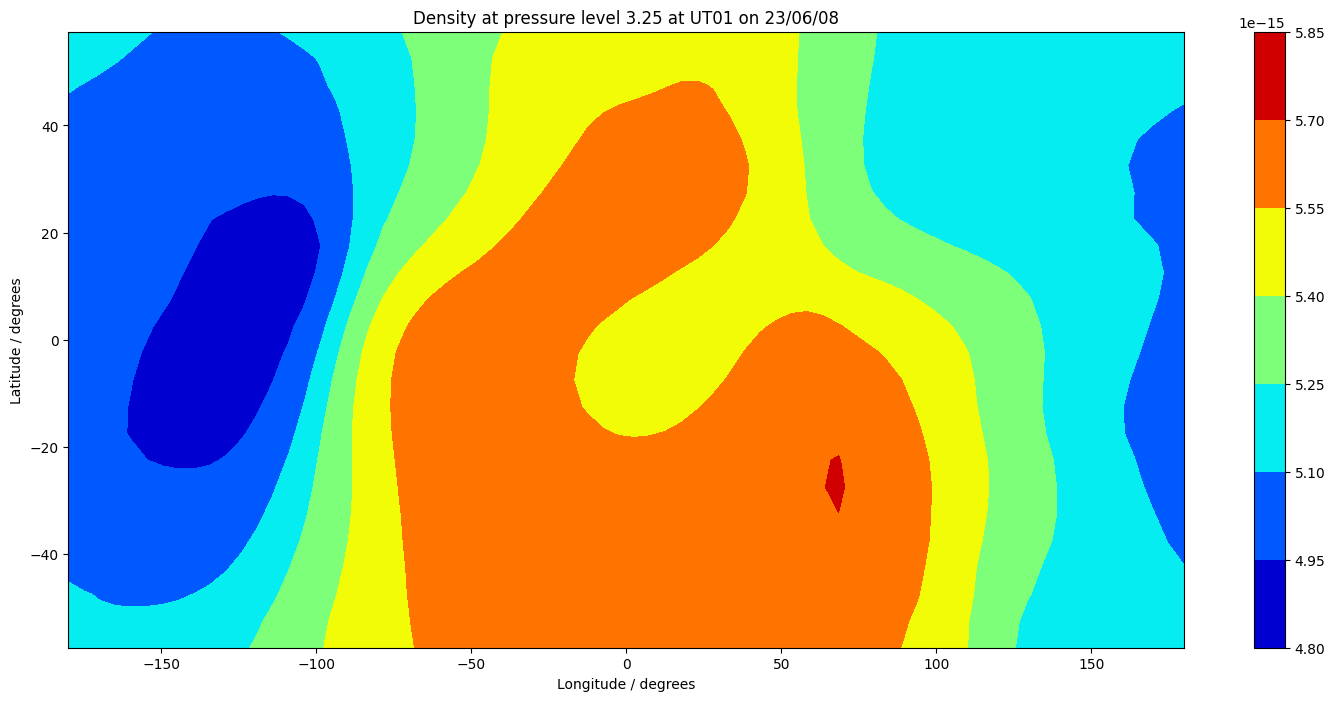

In [ ]:
# STEP 6: compare density plots for this data and Alex's data
newlat = np.linspace(-57.5,57.5,24)
newlon = np.linspace(-180,180,72)
X,Y = np.meshgrid(newlon,newlat)
plt.figure(figsize=(18,8))
plt.contourf(X, Y, density_hour1.iloc[::9], cmap='jet')
plt.xlabel('Longitude / degrees')
plt.ylabel('Latitude / degrees')
plt.title(f'Density at pressure level {tiegcm.lev.values[20]} at UT01 on 23/06/08')
plt.colorbar()
plt.show()

In [7]:
xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_control/tiegcm_states_mean.nc.175001')

<xarray.Dataset>
Dimensions:  (ens: 1, lev: 29, lat: 36, lon: 72, time: 1, ilev: 29, timedim: 3)
Coordinates:
    ilev     (lev) float64 ...
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lev      (lev) float64 -6.75 -6.25 -5.75 -5.25 -4.75 ... 5.75 6.25 6.75 7.25
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Dimensions without coordinates: ens, time, timedim
Data variables: (12/14)
    DEN      (ens, lev, lat, lon) float64 ...
    H        (ens, lev, lat, lon) float64 ...
    HE       (ens, lev, lat, lon) float64 ...
    Kp       (ens, time) float64 ...
    NE       (ens, ilev, lat, lon) float64 ...
    O1       (ens, lev, lat, lon) float64 ...
    ...       ...
    UN       (ens, lev, lat, lon) float64 ...
    VN       (ens, lev, lat, lon) float64 ...
    ZG       (ens, ilev, lat, lon) float64 ...
    f107d    (ens, time) float64 ...
    mtime    (time, timedim) timedelta64[ns] ...
    p0       float64 ...
Attributes:
    history:  Thu Feb 17 14:34:42 2022: ncra tiegcm_states.nc.175001_new tieg...
    NCO:      netCDF Operators version 4.9.5 (Homepage = http://nco.sf.net, C...

In [9]:
# STEP 7: build total 62208x72 tables for heights and densities

import os
folder = ('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_control')
filenames = []
for file in os.listdir(folder):
    filename = os.fsdecode(file)
    filenames.append(filename)

filenames.sort()
print(filenames)

grand_height_array = []
grand_density_array = []
for i in filenames:
    ds = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_control/'+f'{i}')
    zarray_list = []
    for i in np.arange(6,30,1):
        for j in np.arange(20,29,1):
            zarray_list.append(ds.ZG[0,j,i,:].values)

    denarray_list = []
    for i in np.arange(6,30,1):
        for j in np.arange(20,29,1):
            denarray_list.append(ds.DEN[0,j,i,:].values)

    grand_height_array.append(zarray_list)
    grand_density_array.append(denarray_list)

altarray = np.vstack(grand_height_array)
denarray = np.vstack(grand_density_array)
df_altarray = pd.DataFrame(altarray)
df_denarray = pd.DataFrame(denarray)
df_denarray

['tiegcm_states_mean.nc.175001', 'tiegcm_states_mean.nc.175002', 'tiegcm_states_mean.nc.175003', 'tiegcm_states_mean.nc.175004', 'tiegcm_states_mean.nc.175005', 'tiegcm_states_mean.nc.175006', 'tiegcm_states_mean.nc.175007', 'tiegcm_states_mean.nc.175008', 'tiegcm_states_mean.nc.175009', 'tiegcm_states_mean.nc.175010', 'tiegcm_states_mean.nc.175011', 'tiegcm_states_mean.nc.175012', 'tiegcm_states_mean.nc.175013', 'tiegcm_states_mean.nc.175014', 'tiegcm_states_mean.nc.175015', 'tiegcm_states_mean.nc.175016', 'tiegcm_states_mean.nc.175017', 'tiegcm_states_mean.nc.175018', 'tiegcm_states_mean.nc.175019', 'tiegcm_states_mean.nc.175020', 'tiegcm_states_mean.nc.175021', 'tiegcm_states_mean.nc.175022', 'tiegcm_states_mean.nc.175023', 'tiegcm_states_mean.nc.176000', 'tiegcm_states_mean.nc.176001', 'tiegcm_states_mean.nc.176002', 'tiegcm_states_mean.nc.176003', 'tiegcm_states_mean.nc.176004', 'tiegcm_states_mean.nc.176005', 'tiegcm_states_mean.nc.176006', 'tiegcm_states_mean.nc.176007', 'tiegcm

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,5.354127e-15,5.352374e-15,5.350798e-15,5.349750e-15,5.349865e-15,5.351943e-15,5.356839e-15,5.365340e-15,5.378054e-15,5.395303e-15,...,5.456622e-15,5.431590e-15,5.411639e-15,5.395853e-15,5.383458e-15,5.373918e-15,5.366847e-15,5.361856e-15,5.358447e-15,5.356046e-15
1,3.144190e-15,3.143528e-15,3.143206e-15,3.143444e-15,3.144604e-15,3.147130e-15,3.151481e-15,3.158078e-15,3.167240e-15,3.179134e-15,...,3.201586e-15,3.187397e-15,3.176295e-15,3.167629e-15,3.160836e-15,3.155539e-15,3.151511e-15,3.148578e-15,3.146540e-15,3.145153e-15
2,1.834461e-15,1.834256e-15,1.834456e-15,1.835238e-15,1.836852e-15,1.839569e-15,1.843626e-15,1.849196e-15,1.856370e-15,1.865154e-15,...,1.866648e-15,1.858643e-15,1.852566e-15,1.847923e-15,1.844279e-15,1.841351e-15,1.839008e-15,1.837201e-15,1.835886e-15,1.834997e-15
3,1.057299e-15,1.057269e-15,1.057650e-15,1.058605e-15,1.060332e-15,1.063013e-15,1.066762e-15,1.071604e-15,1.077483e-15,1.084293e-15,...,1.075207e-15,1.070770e-15,1.067564e-15,1.065201e-15,1.063334e-15,1.061744e-15,1.060356e-15,1.059188e-15,1.058279e-15,1.057647e-15
4,5.971291e-16,5.971544e-16,5.975658e-16,5.985131e-16,6.001623e-16,6.026439e-16,6.060063e-16,6.101975e-16,6.150846e-16,6.205028e-16,...,6.068845e-16,6.045097e-16,6.029321e-16,6.018474e-16,6.009750e-16,6.001444e-16,5.993142e-16,5.985312e-16,5.978691e-16,5.973870e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10147,6.339688e-16,6.331735e-16,6.326289e-16,6.322897e-16,6.321096e-16,6.320651e-16,6.321737e-16,6.324924e-16,6.330921e-16,6.340125e-16,...,6.527441e-16,6.508323e-16,6.486955e-16,6.464334e-16,6.441519e-16,6.419445e-16,6.398835e-16,6.380219e-16,6.363987e-16,6.350425e-16
10148,3.749445e-16,3.743488e-16,3.739597e-16,3.737489e-16,3.736840e-16,3.737454e-16,3.739387e-16,3.742950e-16,3.748528e-16,3.756287e-16,...,3.878092e-16,3.866478e-16,3.853088e-16,3.838468e-16,3.823253e-16,3.808062e-16,3.793448e-16,3.779892e-16,3.767817e-16,3.757583e-16
10149,2.220202e-16,2.215757e-16,2.212833e-16,2.211283e-16,2.210906e-16,2.211558e-16,2.213240e-16,2.216099e-16,2.220327e-16,2.225973e-16,...,2.303493e-16,2.296890e-16,2.289094e-16,2.280317e-16,2.270865e-16,2.261092e-16,2.251368e-16,2.242068e-16,2.233561e-16,2.226184e-16
10150,1.313127e-16,1.309781e-16,1.307485e-16,1.306184e-16,1.305772e-16,1.306153e-16,1.307301e-16,1.309271e-16,1.312141e-16,1.315907e-16,...,1.364354e-16,1.360964e-16,1.356870e-16,1.352065e-16,1.346632e-16,1.340731e-16,1.334588e-16,1.328469e-16,1.322669e-16,1.317475e-16


In [10]:
with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray_24_control.txt', 'w') as f:
    for row in denarray:
        line = ', '.join(map(str, row))
        f.write(line + '\n')

with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray_24_control.txt', 'w') as f:
    for row in altarray:
        line = ', '.join(map(str, row))
        f.write(line + '\n')

In [ ]:
# STEP 8: convert table to text file

#f = open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray_truth.txt', 'w')
#f.write(str(altarray))
#f.close()

#g = open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray_truth.txt', 'w')
#g.write(str(denarray))
#g.close()

In [ ]:
# STEP 9: repeat for experiment 3
import os
folder3 = ('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_exp3')
filenames3 = []
for file in os.listdir(folder3):
    filename3 = os.fsdecode(file)
    filenames3.append(filename3)

filenames3.sort()
print(filenames3)

grand_height_array3 = []
grand_density_array3 = []
for i in filenames3:
    ds3 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_exp3/'+f'{i}')
    zarray_list3 = []
    for i in np.arange(0,36,1):
        for j in np.arange(19,28,1):
            zarray_list3.append(ds3.ZG_lev[j,i,:].values)

    denarray_list3 = []
    for i in np.arange(0,36,1):
        for j in np.arange(19,28,1):
            denarray_list3.append(ds3.DEN[0,j,i,:].values)

    grand_height_array3.append(zarray_list3)
    grand_density_array3.append(denarray_list3)

altarray3 = np.vstack(grand_height_array3)
denarray3 = np.vstack(grand_density_array3)
df_altarray3 = pd.DataFrame(altarray3)
df_denarray3 = pd.DataFrame(denarray3)
df_denarray3.head(15)

#f3 = open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray3.txt', 'w')
#f3.write(str(altarray3))
#f3.close()

#g3 = open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray3.txt', 'w')
#g3.write(str(denarray3))
#g3.close()

['tiegcm_denPost_mean.nc.175001', 'tiegcm_denPost_mean.nc.175002', 'tiegcm_denPost_mean.nc.175003', 'tiegcm_denPost_mean.nc.175004', 'tiegcm_denPost_mean.nc.175005', 'tiegcm_denPost_mean.nc.175006', 'tiegcm_denPost_mean.nc.175007', 'tiegcm_denPost_mean.nc.175008', 'tiegcm_denPost_mean.nc.175009', 'tiegcm_denPost_mean.nc.175010', 'tiegcm_denPost_mean.nc.175011', 'tiegcm_denPost_mean.nc.175012', 'tiegcm_denPost_mean.nc.175013', 'tiegcm_denPost_mean.nc.175014', 'tiegcm_denPost_mean.nc.175015', 'tiegcm_denPost_mean.nc.175016', 'tiegcm_denPost_mean.nc.175017', 'tiegcm_denPost_mean.nc.175018', 'tiegcm_denPost_mean.nc.175019', 'tiegcm_denPost_mean.nc.175020', 'tiegcm_denPost_mean.nc.175021', 'tiegcm_denPost_mean.nc.175022', 'tiegcm_denPost_mean.nc.175023', 'tiegcm_denPost_mean.nc.176000', 'tiegcm_denPost_mean.nc.176001', 'tiegcm_denPost_mean.nc.176002', 'tiegcm_denPost_mean.nc.176003', 'tiegcm_denPost_mean.nc.176004', 'tiegcm_denPost_mean.nc.176005', 'tiegcm_denPost_mean.nc.176006', 'tiegcm_d

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,9.420929e-15,9.424113e-15,9.426937e-15,9.429397e-15,9.431480e-15,9.433173e-15,9.434458e-15,9.435314e-15,9.435718e-15,9.435642e-15,...,9.370154e-15,9.376699e-15,9.382948e-15,9.388882e-15,9.394488e-15,9.399758e-15,9.404686e-15,9.409269e-15,9.413505e-15,9.417392e-15
1,5.546323e-15,5.548240e-15,5.549972e-15,5.551517e-15,5.552866e-15,5.554010e-15,5.554938e-15,5.555636e-15,5.556089e-15,5.556278e-15,...,5.517542e-15,5.521167e-15,5.524641e-15,5.527954e-15,5.531100e-15,5.534075e-15,5.536877e-15,5.539503e-15,5.541953e-15,5.544227e-15
2,3.250973e-15,3.251998e-15,3.252941e-15,3.253798e-15,3.254567e-15,3.255241e-15,3.255815e-15,3.256279e-15,3.256624e-15,3.256840e-15,...,3.236225e-15,3.238066e-15,3.239830e-15,3.241513e-15,3.243112e-15,3.244628e-15,3.246061e-15,3.247411e-15,3.248679e-15,3.249867e-15
3,1.888014e-15,1.888457e-15,1.888876e-15,1.889269e-15,1.889634e-15,1.889970e-15,1.890273e-15,1.890537e-15,1.890759e-15,1.890930e-15,...,1.881901e-15,1.882676e-15,1.883410e-15,1.884106e-15,1.884763e-15,1.885384e-15,1.885971e-15,1.886525e-15,1.887049e-15,1.887545e-15
4,1.079176e-15,1.079268e-15,1.079367e-15,1.079472e-15,1.079583e-15,1.079701e-15,1.079822e-15,1.079946e-15,1.080069e-15,1.080187e-15,...,1.078088e-15,1.078251e-15,1.078395e-15,1.078522e-15,1.078635e-15,1.078736e-15,1.078829e-15,1.078917e-15,1.079002e-15,1.079088e-15
5,6.014057e-16,6.013084e-16,6.012317e-16,6.011770e-16,6.011451e-16,6.011362e-16,6.011499e-16,6.011855e-16,6.012414e-16,6.013158e-16,...,6.029649e-16,6.028073e-16,6.026415e-16,6.024705e-16,6.022977e-16,6.021264e-16,6.019601e-16,6.018018e-16,6.016548e-16,6.015219e-16
6,3.227056e-16,3.225320e-16,3.223834e-16,3.222610e-16,3.221659e-16,3.220987e-16,3.220597e-16,3.220486e-16,3.220649e-16,3.221076e-16,...,3.253047e-16,3.250175e-16,3.247279e-16,3.244392e-16,3.241546e-16,3.238773e-16,3.236104e-16,3.233571e-16,3.231201e-16,3.229022e-16
7,1.644953e-16,1.643211e-16,1.641691e-16,1.640405e-16,1.639362e-16,1.638567e-16,1.638024e-16,1.637734e-16,1.637696e-16,1.637906e-16,...,1.670562e-16,1.667675e-16,1.664792e-16,1.661940e-16,1.659146e-16,1.656434e-16,1.653831e-16,1.651361e-16,1.649045e-16,1.646903e-16
8,7.917065e-17,7.903941e-17,7.892383e-17,7.882468e-17,7.874257e-17,7.867796e-17,7.863115e-17,7.860230e-17,7.859140e-17,7.859830e-17,...,8.107865e-17,8.086192e-17,8.064637e-17,8.043382e-17,8.022607e-17,8.002484e-17,7.983179e-17,7.964846e-17,7.947630e-17,7.931663e-17
9,9.469519e-15,9.469610e-15,9.470352e-15,9.471812e-15,9.474042e-15,9.477074e-15,9.480923e-15,9.485583e-15,9.491016e-15,9.497125e-15,...,9.478406e-15,9.479064e-15,9.478894e-15,9.478091e-15,9.476847e-15,9.475343e-15,9.473753e-15,9.472236e-15,9.470940e-15,9.469996e-15


In [ ]:
df_altarray3.head(15)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,2.931730e+07,2.931680e+07,2.931604e+07,2.931504e+07,2.931380e+07,2.931234e+07,2.931066e+07,2.930879e+07,2.930675e+07,2.930455e+07,...,2.930903e+07,2.931079e+07,2.931238e+07,2.931379e+07,2.931500e+07,2.931599e+07,2.931674e+07,2.931726e+07,2.931753e+07,2.931754e+07
1,3.121535e+07,3.121473e+07,3.121380e+07,3.121258e+07,3.121107e+07,3.120928e+07,3.120724e+07,3.120497e+07,3.120249e+07,3.119981e+07,...,3.120543e+07,3.120757e+07,3.120950e+07,3.121120e+07,3.121266e+07,3.121384e+07,3.121474e+07,3.121535e+07,3.121566e+07,3.121566e+07
2,3.318705e+07,3.318633e+07,3.318523e+07,3.318377e+07,3.318197e+07,3.317982e+07,3.317737e+07,3.317463e+07,3.317162e+07,3.316838e+07,...,3.317458e+07,3.317724e+07,3.317964e+07,3.318176e+07,3.318357e+07,3.318505e+07,3.318618e+07,3.318696e+07,3.318736e+07,3.318740e+07
3,3.525035e+07,3.524964e+07,3.524847e+07,3.524685e+07,3.524479e+07,3.524231e+07,3.523944e+07,3.523619e+07,3.523260e+07,3.522871e+07,...,3.523308e+07,3.523655e+07,3.523970e+07,3.524250e+07,3.524492e+07,3.524693e+07,3.524852e+07,3.524967e+07,3.525036e+07,3.525059e+07
4,3.743875e+07,3.743834e+07,3.743733e+07,3.743574e+07,3.743357e+07,3.743086e+07,3.742762e+07,3.742388e+07,3.741968e+07,3.741506e+07,...,3.741228e+07,3.741709e+07,3.742150e+07,3.742548e+07,3.742900e+07,3.743201e+07,3.743450e+07,3.743643e+07,3.743780e+07,3.743857e+07
5,3.981215e+07,3.981257e+07,3.981219e+07,3.981102e+07,3.980907e+07,3.980636e+07,3.980291e+07,3.979876e+07,3.979394e+07,3.978850e+07,...,3.976834e+07,3.977542e+07,3.978203e+07,3.978812e+07,3.979362e+07,3.979850e+07,3.980270e+07,3.980620e+07,3.980895e+07,3.981094e+07
6,4.247711e+07,4.247936e+07,4.248050e+07,4.248050e+07,4.247938e+07,4.247715e+07,4.247383e+07,4.246945e+07,4.246406e+07,4.245769e+07,...,4.240113e+07,4.241220e+07,4.242270e+07,4.243254e+07,4.244165e+07,4.244995e+07,4.245737e+07,4.246384e+07,4.246932e+07,4.247375e+07
7,4.562225e+07,4.562817e+07,4.563243e+07,4.563500e+07,4.563586e+07,4.563501e+07,4.563246e+07,4.562824e+07,4.562240e+07,4.561497e+07,...,4.548755e+07,4.550563e+07,4.552302e+07,4.553959e+07,4.555519e+07,4.556971e+07,4.558302e+07,4.559502e+07,4.560561e+07,4.561471e+07
8,4.902226e+07,4.903285e+07,4.904111e+07,4.904700e+07,4.905046e+07,4.905149e+07,4.905007e+07,4.904623e+07,4.904001e+07,4.903147e+07,...,4.881444e+07,4.884117e+07,4.886708e+07,4.889197e+07,4.891563e+07,4.893788e+07,4.895854e+07,4.897745e+07,4.899446e+07,4.900943e+07
9,2.944222e+07,2.943931e+07,2.943491e+07,2.942907e+07,2.942190e+07,2.941349e+07,2.940398e+07,2.939350e+07,2.938217e+07,2.937015e+07,...,2.938846e+07,2.939980e+07,2.941007e+07,2.941914e+07,2.942691e+07,2.943328e+07,2.943818e+07,2.944155e+07,2.944336e+07,2.944358e+07


In [ ]:
#########################################################################
## 28 FEBRUARY 2024 - after further clarification, need to change table
#########################################################################

with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray3_march24.txt', 'w') as f:
    for row in denarray3:
        line = ', '.join(map(str, row))
        f.write(line + '\n')

with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray3_march24.txt', 'w') as f:
    for row in altarray3:
        line = ', '.join(map(str, row))
        f.write(line + '\n')

In [ ]:
#######################################################################
## 5 MARCH 2024 - prepare TIEGCMs from UT03 onwards
#######################################################################

import os
folder4 = ('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_exp3')
filenames4 = []
for file in os.listdir(folder4):
    filename4 = os.fsdecode(file)
    filenames4.append(filename4)

filenames4.sort()
filenames4 = filenames4[2:]
print(filenames4)

grand_height_array4 = []
grand_density_array4 = []
for i in filenames4:
    ds4 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_exp3/'+f'{i}')
    zarray_list4 = []
    for i in np.arange(0,36,1):
        for j in np.arange(20,29,1):
            zarray_list4.append(ds4.ZG_lev[j,i,:].values)

    denarray_list4 = []
    for i in np.arange(0,36,1):
        for j in np.arange(20,29,1):
            denarray_list4.append(ds4.DEN[0,j,i,:].values)

    grand_height_array4.append(zarray_list4)
    grand_density_array4.append(denarray_list4)

altarray4 = np.vstack(grand_height_array4)
denarray4 = np.vstack(grand_density_array4)
with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray_exp3_graceA.txt', 'w') as f:
    for row in denarray4:
        line = ', '.join(map(str, row))
        f.write(line + '\n')
with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray_exp3_graceA.txt', 'w') as f:
    for row in altarray4:
        line = ', '.join(map(str, row))
        f.write(line + '\n')

['tiegcm_denPost_mean.nc.175003', 'tiegcm_denPost_mean.nc.175004', 'tiegcm_denPost_mean.nc.175005', 'tiegcm_denPost_mean.nc.175006', 'tiegcm_denPost_mean.nc.175007', 'tiegcm_denPost_mean.nc.175008', 'tiegcm_denPost_mean.nc.175009', 'tiegcm_denPost_mean.nc.175010', 'tiegcm_denPost_mean.nc.175011', 'tiegcm_denPost_mean.nc.175012', 'tiegcm_denPost_mean.nc.175013', 'tiegcm_denPost_mean.nc.175014', 'tiegcm_denPost_mean.nc.175015', 'tiegcm_denPost_mean.nc.175016', 'tiegcm_denPost_mean.nc.175017', 'tiegcm_denPost_mean.nc.175018', 'tiegcm_denPost_mean.nc.175019', 'tiegcm_denPost_mean.nc.175020', 'tiegcm_denPost_mean.nc.175021', 'tiegcm_denPost_mean.nc.175022', 'tiegcm_denPost_mean.nc.175023', 'tiegcm_denPost_mean.nc.176000', 'tiegcm_denPost_mean.nc.176001', 'tiegcm_denPost_mean.nc.176002', 'tiegcm_denPost_mean.nc.176003', 'tiegcm_denPost_mean.nc.176004', 'tiegcm_denPost_mean.nc.176005', 'tiegcm_denPost_mean.nc.176006', 'tiegcm_denPost_mean.nc.176007', 'tiegcm_denPost_mean.nc.176008', 'tiegcm_d

In [ ]:
folder5 = ('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_truth')
filenames5 = []
for file in os.listdir(folder5):
    filename5 = os.fsdecode(file)
    filenames5.append(filename5)

filenames5.sort()
filenames5 = filenames5[2:-2]
print(filenames5)

grand_height_array5 = []
grand_density_array5 = []
for i in filenames5:
    ds5 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_truth/'+f'{i}')
    zarray_list5 = []
    for i in np.arange(0,36,1):
        for j in np.arange(20,29,1):
            zarray_list5.append(ds5.ZG_lev[j,i,:].values)

    denarray_list5 = []
    for i in np.arange(0,36,1):
        for j in np.arange(20,29,1):
            denarray_list5.append(ds5.DEN[0,j,i,:].values)

    grand_height_array5.append(zarray_list5)
    grand_density_array5.append(denarray_list5)

altarray5 = np.vstack(grand_height_array5)
denarray5 = np.vstack(grand_density_array5)
with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray_truth_graceA.txt', 'w') as f:
    for row in denarray5:
        line = ', '.join(map(str, row))
        f.write(line + '\n')
with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray_truth_graceA.txt', 'w') as f:
    for row in altarray5:
        line = ', '.join(map(str, row))
        f.write(line + '\n')

['tiegcm_trueLow.nc.175003', 'tiegcm_trueLow.nc.175004', 'tiegcm_trueLow.nc.175005', 'tiegcm_trueLow.nc.175006', 'tiegcm_trueLow.nc.175007', 'tiegcm_trueLow.nc.175008', 'tiegcm_trueLow.nc.175009', 'tiegcm_trueLow.nc.175010', 'tiegcm_trueLow.nc.175011', 'tiegcm_trueLow.nc.175012', 'tiegcm_trueLow.nc.175013', 'tiegcm_trueLow.nc.175014', 'tiegcm_trueLow.nc.175015', 'tiegcm_trueLow.nc.175016', 'tiegcm_trueLow.nc.175017', 'tiegcm_trueLow.nc.175018', 'tiegcm_trueLow.nc.175019', 'tiegcm_trueLow.nc.175020', 'tiegcm_trueLow.nc.175021', 'tiegcm_trueLow.nc.175022', 'tiegcm_trueLow.nc.175023', 'tiegcm_trueLow.nc.176000', 'tiegcm_trueLow.nc.176001', 'tiegcm_trueLow.nc.176002', 'tiegcm_trueLow.nc.176003', 'tiegcm_trueLow.nc.176004', 'tiegcm_trueLow.nc.176005', 'tiegcm_trueLow.nc.176006', 'tiegcm_trueLow.nc.176007', 'tiegcm_trueLow.nc.176008', 'tiegcm_trueLow.nc.176009', 'tiegcm_trueLow.nc.176010', 'tiegcm_trueLow.nc.176011', 'tiegcm_trueLow.nc.176012', 'tiegcm_trueLow.nc.176013', 'tiegcm_trueLow.nc.

In [ ]:
folder5 = ('/content/gdrive/MyDrive/msci_satellite_data/tiegcm_dietrich_truth')
filenames5 = []
for file in os.listdir(folder5):
    filename5 = os.fsdecode(file)
    filenames5.append(filename5)

filenames5.sort()
filenames5 = filenames5[2:-2]
print(filenames5)
len(filenames5)

['tiegcm_trueLow.nc.175003', 'tiegcm_trueLow.nc.175004', 'tiegcm_trueLow.nc.175005', 'tiegcm_trueLow.nc.175006', 'tiegcm_trueLow.nc.175007', 'tiegcm_trueLow.nc.175008', 'tiegcm_trueLow.nc.175009', 'tiegcm_trueLow.nc.175010', 'tiegcm_trueLow.nc.175011', 'tiegcm_trueLow.nc.175012', 'tiegcm_trueLow.nc.175013', 'tiegcm_trueLow.nc.175014', 'tiegcm_trueLow.nc.175015', 'tiegcm_trueLow.nc.175016', 'tiegcm_trueLow.nc.175017', 'tiegcm_trueLow.nc.175018', 'tiegcm_trueLow.nc.175019', 'tiegcm_trueLow.nc.175020', 'tiegcm_trueLow.nc.175021', 'tiegcm_trueLow.nc.175022', 'tiegcm_trueLow.nc.175023', 'tiegcm_trueLow.nc.176000', 'tiegcm_trueLow.nc.176001', 'tiegcm_trueLow.nc.176002', 'tiegcm_trueLow.nc.176003', 'tiegcm_trueLow.nc.176004', 'tiegcm_trueLow.nc.176005', 'tiegcm_trueLow.nc.176006', 'tiegcm_trueLow.nc.176007', 'tiegcm_trueLow.nc.176008', 'tiegcm_trueLow.nc.176009', 'tiegcm_trueLow.nc.176010', 'tiegcm_trueLow.nc.176011', 'tiegcm_trueLow.nc.176012', 'tiegcm_trueLow.nc.176013', 'tiegcm_trueLow.nc.

44

In [ ]:
#######################################################################
## 14 MARCH 2024 - prepare new TIEGCMs in full
#######################################################################

import os
folder6 = ('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_ose')
filenames6 = []
for file in os.listdir(folder6):
    filename6 = os.fsdecode(file)
    filenames6.append(filename6)

filenames6.sort()
print(filenames6)
print(len(filenames6))

grand_height_array6 = []
grand_density_array6 = []
for i in filenames6:
    ds6 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/matsuo_tiegcm_ose/'+f'{i}')
    if i=='tiegcm_s_ensmean.nc.00':
      time_index = 15
    else:
      time_index = 1
    zarray_list6 = []
    for i in np.arange(0,36,1):
        for j in np.arange(20,29,1):
            zarray_list6.append(ds6.ZG.values[time_index,j,i,:])

    denarray_list6 = []
    for i in np.arange(0,36,1):
        for j in np.arange(20,29,1):
            denarray_list6.append(ds6.DEN.values[time_index,j,i,:])

    grand_height_array6.append(zarray_list6)
    grand_density_array6.append(denarray_list6)

altarray6 = np.vstack(grand_height_array6)
denarray6 = np.vstack(grand_density_array6)
#with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray_ose_36.txt', 'w') as f:
 #   for row in denarray6:
  #      line = ', '.join(map(str, row))
   #     f.write(line + '\n')
#with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray_ose_36.txt', 'w') as f:
 #   for row in altarray6:
  #      line = ', '.join(map(str, row))
   #     f.write(line + '\n')

['tiegcm_s_ensmean.nc.00', 'tiegcm_s_ensmean.nc.01', 'tiegcm_s_ensmean.nc.02', 'tiegcm_s_ensmean.nc.03', 'tiegcm_s_ensmean.nc.04', 'tiegcm_s_ensmean.nc.05', 'tiegcm_s_ensmean.nc.06', 'tiegcm_s_ensmean.nc.07', 'tiegcm_s_ensmean.nc.08', 'tiegcm_s_ensmean.nc.09', 'tiegcm_s_ensmean.nc.10', 'tiegcm_s_ensmean.nc.11', 'tiegcm_s_ensmean.nc.12', 'tiegcm_s_ensmean.nc.13', 'tiegcm_s_ensmean.nc.14', 'tiegcm_s_ensmean.nc.15', 'tiegcm_s_ensmean.nc.16', 'tiegcm_s_ensmean.nc.17', 'tiegcm_s_ensmean.nc.18', 'tiegcm_s_ensmean.nc.19', 'tiegcm_s_ensmean.nc.20', 'tiegcm_s_ensmean.nc.21', 'tiegcm_s_ensmean.nc.22', 'tiegcm_s_ensmean.nc.23', 'tiegcm_s_ensmean.nc.24']
25


In [ ]:
########## nasa
import os
folder7 = ('/content/gdrive/MyDrive/msci_satellite_data/nasa')
filenames7 = []
for file in os.listdir(folder7):
    filename7 = os.fsdecode(file)
    filenames7.append(filename7)

filenames7.sort()
print(filenames7)

grand_height_array7 = []
grand_density_array7 = []
for i in filenames7:
    ds7 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/nasa/'+f'{i}')
    if i=='s003.nc':
      time_index = [16]
    else:
      time_index = np.arange(0,24,1)
    zarray_list7 = []
    for t in time_index:
        for i in np.arange(0,36,1):
            for j in np.arange(20,29,1):
                zarray_list7.append(ds7.ZG.values[t,j,i,:])

    denarray_list7 = []
    for t in time_index:
        for i in np.arange(0,36,1):
            for j in np.arange(20,29,1):
                denarray_list7.append(ds7.DEN.values[t,j,i,:])

    grand_height_array7.append(zarray_list7)
    grand_density_array7.append(denarray_list7)

altarray7 = np.vstack(grand_height_array7)
denarray7 = np.vstack(grand_density_array7)
#with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray_control_36.txt', 'w') as f:
 #   for row in denarray7:
  #      line = ', '.join(map(str, row))
   #     f.write(line + '\n')
#with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray_control_36.txt', 'w') as f:
 #   for row in altarray7:
  #      line = ', '.join(map(str, row))
   #     f.write(line + '\n')

['s003.nc', 's004.nc', 's005.nc', 's006.nc']


In [ ]:
pd.DataFrame(altarray6)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,32099438.0,32098746.0,32097806.0,32096626.0,32095210.0,32093570.0,32091718.0,32089666.0,32087434.0,32085038.0,...,32093386.0,32094936.0,32096306.0,32097482.0,32098454.0,32099208.0,32099736.0,32100028.0,32100078.0,32099882.0
1,34176880.0,34176204.0,34175240.0,34173988.0,34172456.0,34170652.0,34168596.0,34166296.0,34163776.0,34161056.0,...,34168300.0,34170264.0,34172020.0,34173552.0,34174840.0,34175876.0,34176644.0,34177136.0,34177340.0,34177256.0
2,36284804.0,36284108.0,36283068.0,36281700.0,36280004.0,36277996.0,36275688.0,36273096.0,36270248.0,36267164.0,...,36274020.0,36276384.0,36278504.0,36280360.0,36281940.0,36283224.0,36284196.0,36284848.0,36285172.0,36285156.0
3,38418340.0,38417584.0,38416444.0,38414924.0,38413028.0,38410780.0,38408188.0,38405276.0,38402064.0,38398584.0,...,38405612.0,38408356.0,38410820.0,38412984.0,38414828.0,38416336.0,38417488.0,38418272.0,38418680.0,38418704.0
4,40573996.0,40573160.0,40571888.0,40570188.0,40568072.0,40565552.0,40562652.0,40559388.0,40555796.0,40551892.0,...,40559520.0,40562628.0,40565424.0,40567880.0,40569972.0,40571680.0,40572992.0,40573888.0,40574360.0,40574396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,40781616.0,40794316.0,40806240.0,40817300.0,40827412.0,40836500.0,40844500.0,40851348.0,40856996.0,40861404.0,...,40635204.0,40649736.0,40664600.0,40679680.0,40694864.0,40710032.0,40725068.0,40739856.0,40754280.0,40768236.0
8096,43318628.0,43330944.0,43342464.0,43353100.0,43362772.0,43371408.0,43378944.0,43385328.0,43390508.0,43394448.0,...,43174280.0,43188772.0,43203560.0,43218524.0,43233552.0,43248524.0,43263328.0,43277852.0,43291980.0,43305608.0
8097,45928144.0,45939796.0,45950632.0,45960568.0,45969532.0,45977460.0,45984288.0,45989972.0,45994464.0,45997740.0,...,45788388.0,45802644.0,45817136.0,45831752.0,45846380.0,45860904.0,45875212.0,45889196.0,45902748.0,45915760.0
8098,48599400.0,48610132.0,48620028.0,48629020.0,48637040.0,48644024.0,48649924.0,48654700.0,48658312.0,48660736.0,...,48466548.0,48480384.0,48494384.0,48508440.0,48522440.0,48536280.0,48549848.0,48563044.0,48575768.0,48587916.0


In [ ]:
import os
folder8 = ('/content/gdrive/MyDrive/msci_satellite_data/nasa')
filenames8 = []
for file in os.listdir(folder8):
    filename8 = os.fsdecode(file)
    filenames8.append(filename8)

filenames8.sort()
print(filenames8)

grand_height_array8 = []
grand_density_array8 = []
for i in filenames8:
    ds8 = xr.open_dataset('/content/gdrive/MyDrive/msci_satellite_data/nasa/'+f'{i}')
    if i=='s003.nc':
      time_index = [16]
    if i=='s006.nc':
      time_index = np.arange(2,23,3)
    else:
      time_index = np.arange(2,24,3)
    zarray_list8 = []
    for t in time_index:
        for i in np.arange(0,36,1):
            for j in np.arange(20,29,1):
                zarray_list8.append(ds8.ZG.values[t,j,i,:])

    denarray_list8 = []
    for t in time_index:
        for i in np.arange(0,36,1):
            for j in np.arange(20,29,1):
                denarray_list8.append(ds8.DEN.values[t,j,i,:])

    grand_height_array8.append(zarray_list8)
    grand_density_array8.append(denarray_list8)

altarray8 = np.vstack(grand_height_array8)
denarray8 = np.vstack(grand_density_array8)
with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/denarray_control_36_hourly.txt', 'w') as f:
    for row in denarray8:
        line = ', '.join(map(str, row))
        f.write(line + '\n')
with open('/content/gdrive/MyDrive/msci_satellite_data/ODL_arrays/altarray_control_36_hourly.txt', 'w') as f:
    for row in altarray8:
        line = ', '.join(map(str, row))
        f.write(line + '\n')

['s003.nc', 's004.nc', 's005.nc', 's006.nc']
